In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from scipy.spatial import ConvexHull

%matplotlib notebook

In [5]:
# Generate random dots
dots = np.random.rand(3, 10) * 100 # Shape ndot * ndim

In [24]:
# Function for plotting the convex of 
def convex_mesh(x, y, z):
    
    # compute the convex hull of the points
    cvx = ConvexHull(np.array([x, y, z]).T)

    # cvx.simplices contains an (nfacets, 3) array specifying the indices of the vertices for each simplical facet
    tri = Triangulation(x, y, triangles=cvx.simplices)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    ax.plot_trisurf(tri, z) # Plot the triangle
    ax.scatter(x, y, z, color='r') # plot all the dots

    plt.draw()

<IPython.core.display.Javascript object>


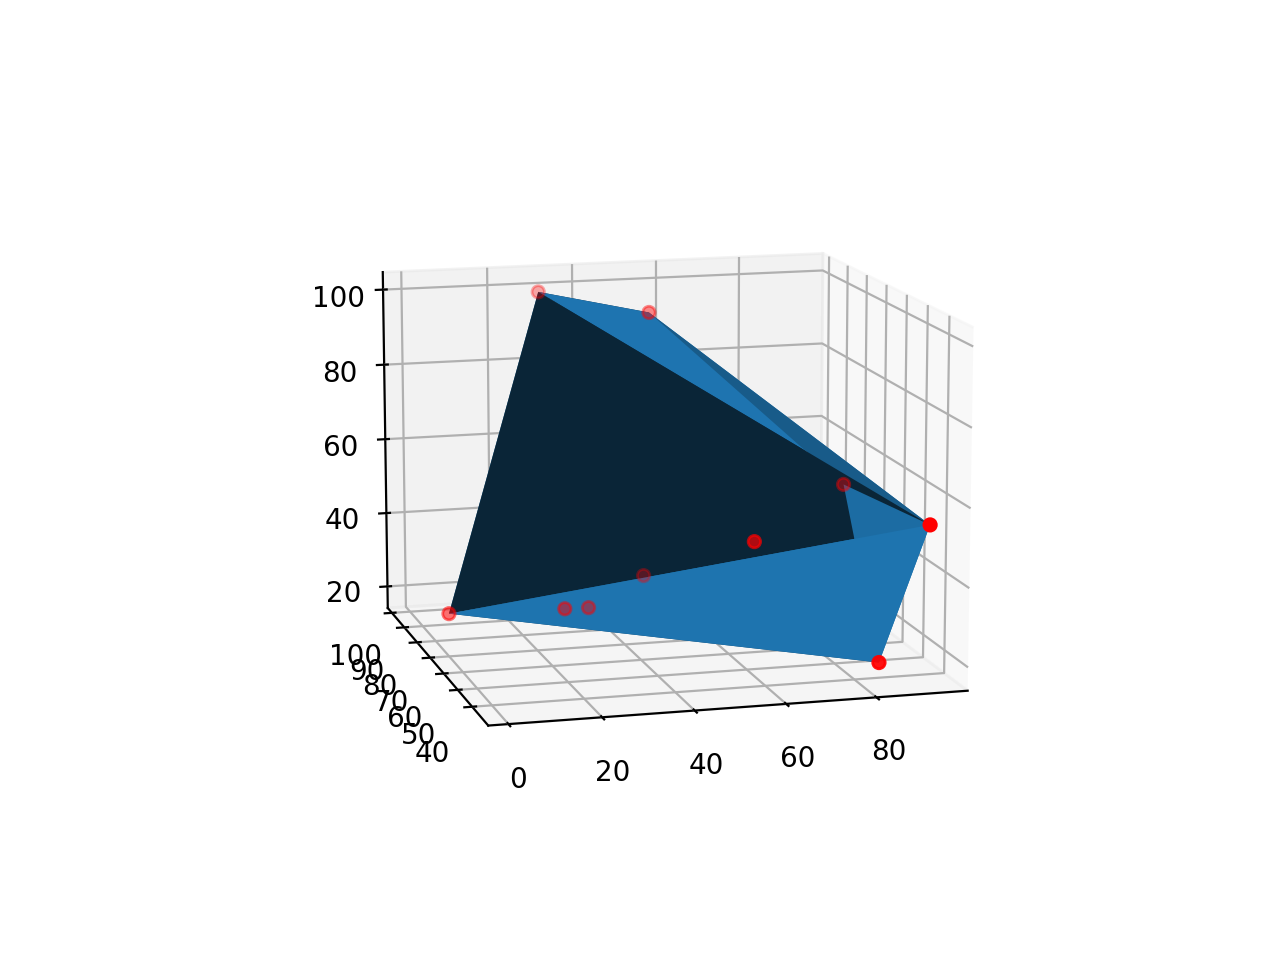

In [25]:
convex_mesh(*dots)